Tensorflow Model with the new Data Set 

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn import preprocessing
import process_csv_data
import betting
import numpy as np
import csv

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import seaborn as sns

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.15.0
Eager execution: False


In [5]:
def slice_the_set(df,start,end):

    start = int(len(df)*start/100)
    end = int(len(df)*end/100)

    return df.iloc[start:end]

In [6]:
df =pd.read_csv("..\data\export_dataframe.csv")
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])



#df_train = slice_the_set(df,0,80)
#df_test = slice_the_set(df,80,100)

df.head()

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,0,1.36,4.75,8.50,7,1,2,26,12,3,6,1,11,6
1,1,2.40,3.30,2.90,2,3,5,9,14,5,2,3,17,12
2,1,3.20,3.30,2.25,4,2,4,11,13,7,2,1,19,8
3,2,1.75,3.75,4.33,4,1,5,14,16,4,1,5,13,12
4,1,1.40,4.33,8.00,5,3,2,21,11,2,3,5,14,20


In [7]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [8]:
train_stats = train_dataset.describe()
train_stats.pop("result")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
odds-home,19163.0,2.295273,1.893925,0.0,1.44,2.0,2.63,26.0
odds-draw,19163.0,3.356001,1.678126,0.0,3.20,3.4,3.80,17.0
odds-away,19163.0,4.071096,3.881642,0.0,2.00,3.2,4.75,51.0
home-wins,19163.0,3.691124,1.937909,0.0,2.00,3.0,5.00,10.0
home-draws,19163.0,2.596201,1.395704,0.0,2.00,2.0,3.00,8.0
home-losses,19163.0,3.712675,1.869391,0.0,2.00,4.0,5.00,10.0
home-goals,19163.0,13.490581,5.341217,1.0,10.00,13.0,16.00,46.0
home-opposition-goals,19163.0,13.521839,4.642763,0.0,10.00,13.0,16.00,34.0
away-wins,19163.0,3.779471,1.957353,0.0,2.00,4.0,5.00,10.0
away-draws,19163.0,2.589887,1.389944,0.0,2.00,2.0,3.00,8.0


In [10]:
train_dataset.result

3008     0
12144    2
9746     1
6002     2
20244    1
        ..
13412    0
19406    0
6495     1
4739     1
15393    2
Name: result, Length: 19163, dtype: int32

In [11]:

train_features = train_dataset.result
test_features = test_dataset.result
train_labels = train_dataset.pop('result')
test_labels = test_dataset.pop('result')



In [12]:
#def norm(x):
#  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = train_dataset #norm(train_dataset)
normed_test_data =test_dataset# norm(test_dataset)

In [13]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [14]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-2.3401985 ],
       [ 0.00813353],
       [-0.7332323 ],
       [ 0.46176714],
       [-0.34683466],
       [-1.3829132 ],
       [ 0.9489411 ],
       [-0.77001524],
       [ 0.03102827],
       [-0.06030893]], dtype=float32)

In [17]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.8448,  mean_absolute_error:0.7654,  mean_squared_error:0.8448,  val_loss:1.7812,  val_mean_absolute_error:1.0758,  val_mean_squared_error:1.7812,  
....................................................................................................

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.600774,0.666456,0.600774,0.637456,0.692902,0.637457,95
96,0.598416,0.664881,0.598416,0.631041,0.678685,0.631041,96
97,0.600045,0.666407,0.600045,0.628966,0.682191,0.628966,97
98,0.600999,0.666782,0.600999,0.633985,0.673724,0.633985,98
99,0.598888,0.665593,0.598889,0.629573,0.676645,0.629573,99


In [19]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

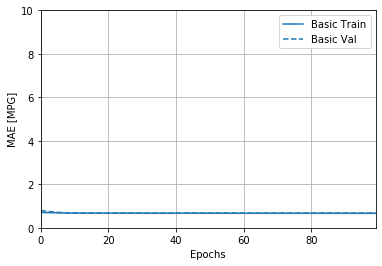

In [20]:
import matplotlib.pyplot as plt
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

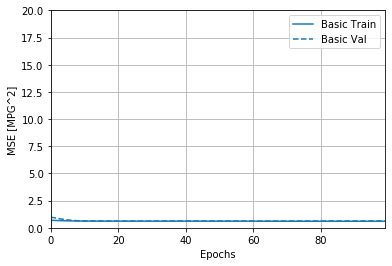

In [22]:
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [23]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.7908,  mean_absolute_error:0.7476,  mean_squared_error:0.7908,  val_loss:1.0487,  val_mean_absolute_error:0.8811,  val_mean_squared_error:1.0487,  
...................

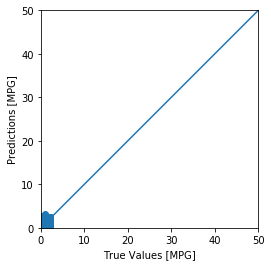

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

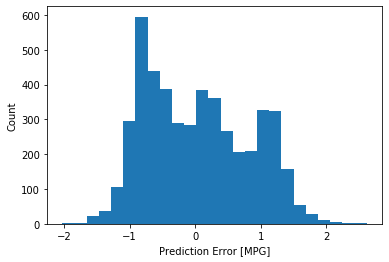

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [27]:
print('\n# Evaluate on test data')
results = model.evaluate(test_dataset, test_labels, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
4791/4791 [==============================] - 0s 14us/sample - loss: 0.6318 - mean_absolute_error: 0.6792 - mean_squared_error: 0.6318
test loss, test acc: [0.6317634684784231, 0.6791679, 0.63176346]
